# Statistics

## Answer 11

In [1]:
import scipy.stats as stats
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [4]:
df = pd.read_csv("/content/data.csv")
df

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140
...,...,...,...
95,96,136,129
96,97,143,137
97,98,127,123
98,99,139,135


- ## Checking the distribution of classes using paired t-test

In [6]:
t_statistic, p_value = stats.ttest_rel(df[' Blood Pressure Before (mmHg)'], df[' Blood Pressure After (mmHg)'])
print("Paired t-test p-value:", p_value)

Paired t-test p-value: 2.817165090364283e-61


- ## Checking the equality of variance using Levene's test

In [8]:
statistic, p_value = stats.levene(df[' Blood Pressure Before (mmHg)'], df[' Blood Pressure After (mmHg)'])
print("Levene's test p-value:", p_value)

Levene's test p-value: 0.6715080090945376


In [9]:
# Selecting the columns of interest for covariance analysis
selected_columns = [' Blood Pressure Before (mmHg)', ' Blood Pressure After (mmHg)']
selected_data = df[selected_columns]

# Computing the covariance matrix
covariance_matrix = np.cov(selected_data.T)

# Printing the covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
[[43.53727273 44.44686869]
 [44.44686869 47.44484848]]


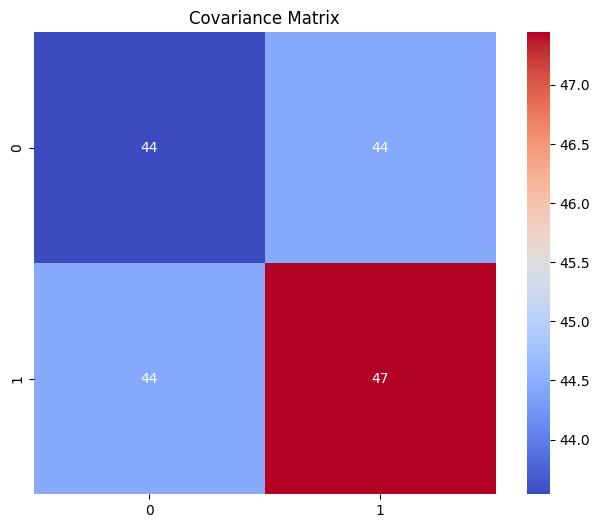

In [10]:
# Visualizing the covariance matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Covariance Matrix')
plt.show()

# Which amount LDA and QDA would perform better on this data for classification 

In [11]:
X = df[[' Blood Pressure Before (mmHg)']]
y = df[' Blood Pressure After (mmHg)']


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Performing LDA classification
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_predictions = lda.predict(X_test)
lda_accuracy = accuracy_score(y_test, lda_predictions)
print("LDA Accuracy:", lda_accuracy)

LDA Accuracy: 0.6


In [13]:
# Instantiate the QDA model
qda = QuadraticDiscriminantAnalysis()

# Fit the QDA model
qda.fit(X_train, y_train)

# Make predictions on the test set using QDA
qda_predictions = qda.predict(X_test)

# Compute accuracy of QDA
qda_accuracy = accuracy_score(y_test, qda_predictions)
print("QDA Accuracy:", qda_accuracy)

ValueError: ignored

In the context of our data, the error encountered while performing QDA indicates that there is only one sample in class 119, which leads to an ill-defined covariance matrix estimation. This means that the QDA algorithm requires more samples per class to accurately estimate the covariance matrix.

In such cases, LDA can be a better choice compared to QDA. LDA assumes that the classes share a common covariance matrix, which reduces the risk of overfitting when there are limited samples per class. By assuming a shared covariance matrix, LDA estimates the covariance matrix more robustly, even with fewer samples.

LDA performs well when the assumption of a common covariance matrix holds true, and when the classes are well-separated. It finds a linear discriminant function that maximizes the separation between classes while minimizing the within-class scatter. LDA can be effective in reducing the dimensionality of the data while preserving the discriminative information for classification tasks.

In summary, the limited number of samples per class, LDA is a more suitable choice than QDA for our dataset. It offers a more stable and reliable estimation of the covariance matrix when the assumption of a common covariance matrix holds true.

- ## Checking the equality of means using paired t-test

In [15]:
t_statistic, p_value = stats.ttest_rel(df[' Blood Pressure Before (mmHg)'], df[' Blood Pressure After (mmHg)'])
print("Paired t-test p-value:", p_value)

Paired t-test p-value: 2.817165090364283e-61
